In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math, warnings
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D
from random import random
#from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import  Ridge
from sklearn.preprocessing import PolynomialFeatures


sns.set()
warnings.filterwarnings('ignore')

<h1>L1 and L2 Reguralization </h1> 

<h2>
  <p>
    <a href =   "https://github.com/daodavid" > 
         author: daodeiv (David Stankov) 
       <img src="https://cdn.thenewstack.io/media/2014/12/github-octocat.png" align="left" width="120"  alt="daodavid" >
    </a>
  </p>      
</h2>   


<h6>
  <font size="4" face = "Times New Roma" color='#3f134f' > 
    <ul style="margin-left: 30px">
      <li><a href='#intro-pol'> Polynomial Regression, Bias and Variance </a> </li> <br>
      <li><a href='#lasso'> Lasso Regression (L1 Regularization)</a> </li><br>
      <li><a href='#feature'> Lasso as feature selection</a> </li><br>  
      <li><a href='#ridge'> Ridge regression (L2 regularization)</a> </li><br>          
</ul>    
 </font>
  </h6>

<h2 id='intro-pol'> Polynomial Regression, Bias and Variance</h2>

Polynomial Regression is a type of regression supervised algorithm in which the relationship between feature vector $X$ and target one $Y$ is an $n^{th}$ degree polynomial function. <br> We gonna use the data set which is prepared in advance using $3^{th}$ degree polynomial <br> <br> $$y_i = f(x_i) =  \theta_3x_{i}^3 + \theta_2x_i^2 +\theta_1x_i +  \theta_0 + \varepsilon_i $$ <br>
$$ \; \; \;  =  x - 2x^2 + 0.2x^3 + \varepsilon_i $$ <br> 
The $\varepsilon$ is Gaussian distributed with mean zero and some  variance $\sigma$   <br> <br>
$$𝜀 \sim N(0,\sigma^2) $$ 

In [34]:
np.random.seed(0)
x =  np.linspace(-5,10,num=30) #generate the X data  
y = x - 2 * (x ** 2) + 0.2 * (x ** 3)  + np.random.normal(-5, 5, size=x.size) +2 #generate target points y

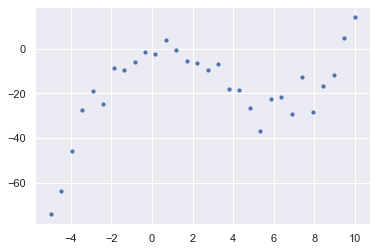

In [35]:
x = x[:, np.newaxis]
y = y[:, np.newaxis]
plt.scatter(x,y, s=10)
plt.show()

Now we gonna use already prepared data and we will try to find the best fitting polynomial using some regression model.

In [8]:
def regression(model, x_train, y_train, x_test, y_test) :
    std = StandardScaler().fit(x_train)
    regr_type = model.fit(std.transform(x_train),y_train)
    y_predicited = regr_type.predict(std.transform(x_test))
    return y_predicited, regr_type.score(std.transform(x_train), y_train),regr_type.score(std.transform(x_test),y_test), regr_type.coef_   

In [9]:
y_pred, score_train, score_test, coef = regression(LinearRegression(), x, y, x, y)

Text(0.5, 1.0, 'accuracy = 0.16333333102399328')

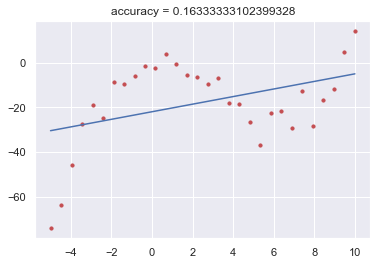

In [28]:
y_pred, score_train, score_test , coef = regression(LinearRegression(), x, y, x, y)
plt.plot(x, y_pred)  #L = 0.0028
plt.scatter(x, y, s=10, color='r')
plt.title('accuracy = {}'.format(score_train))


As we can see above, using a straight line we've achieved approx 16% accuracy which is too bad. In that case, when the model is too simple to fit the data we say the model is an <mark> underfitting </mark>. The simple linear regression  is not able to capture the points well, this called <mark> high bias </mark>. Model with high bias pays very little attention to the training data and oversimplifies the model. It always leads to high error on training and test data. We can boost the model by increasing the degree of the polynomial. We can add new features that are powers of the original one. 

$$X = \begin{bmatrix} 
 x_1 \\
\vdots   \\
 x_n \\
\end{bmatrix} 	\rightarrow 
X_{polyData} = T(X) = \begin{bmatrix} 
1 &x_1 & x_1^2 & \dots & x_1^p \\
\vdots & \ddots &  \ddots & \vdots & \vdots \\
1& x_n & x_n^2  & \dots & x_n^p \\
\end{bmatrix} $$

Thus we can improve the model from $Y = \omega_0  + \omega_1x$ to $Y = \omega_0  + \omega_1 x^1 + ... + \omega_p x^p$
but the problem still remains linear because $Y$ is multi linear dependented to $x_i^j$.That means we can use again the LinearRegression(). We will tranform the data into $39^{th}$ degree polynomial. 

In [14]:
def polynomial_convert(X,degree):
    '''
    X : like array 
       dataset
    degree : int 
       number of powers
    '''
    return PolynomialFeatures(degree=degree).fit_transform(X)   
   

Text(0.5, 1.0, 'accuracy = 0.9999507021155106')

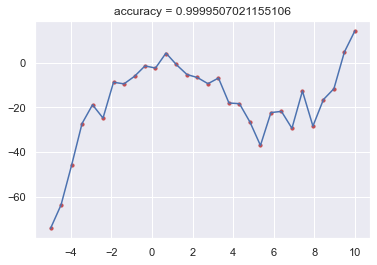

In [29]:
x_poly = polynomial_convert(x, degree = 39)
y_pred, score_train, score_test, coef = regression(LinearRegression(), x_poly, y, x_poly, y)
plt.plot(x, y_pred)  #L = 0.0028
plt.scatter(x,y, s=10,color='r')
plt.title('accuracy = {}'.format(score_train))

We can see that the accuracy of $39^{th}$ polynomial is 99.9%. This model cannot be right because the data set has uncertainty. When the model fits the uncertainty(error or bias) that is called <mark>overfitting</mark> or the model has <mark> high variance </mark>. On new unseen data the model will perform bad result. <br> <br>

There are quite a number of techniques that help us to prevent overfitting. Regularization is one such technique. Regularization basically aims at proper feature selection to avoid over-fitting.

<h2 id='lasso'> Lasso Regression (L1 Regularization) </h2>

This is a regularization technique used in feature selection using a Shrinkage method also referred to as the penalized regression method. Lasso is short for Least Absolute Shrinkage and Selection Operator, which is used both for regularization and model selection. If a model uses the L1 regularization technique, then it is called lasso regression.Lasso regression achieves regularization by completely diminishing the importance given to some features (making the weight zero).


The lost function of the Lasso is the ordinary least square with constraint optimization.<br> <br>
    $$J(\varTheta) = \frac{1}{2m}\sum_{i}^n(  y_i - \sum_j^mx_{ij}\theta_j)^2 $$
    $$subject \; to \hspace{1cm} \sum_j^m|\theta_j| < \lambda $$
Using langrange multiplyer the solutions of above equtions is :

$$LassoLost = J(\varTheta) = \frac{1}{2m}\sum_{i}^n(  y_i - \sum_j^m x_{ij}\theta_j )^2 + \lambda \sum_j^m|\theta_j|$$

$\lambda \sum_j^m|\theta_j|$ represens the penalty <br>
A tuning parameter, $λ$ controls the strength of the L1 penalty. $λ$ is basically the amount of shrinkage:
<ul>
  <li>When λ = 0, no parameters are eliminated. The estimate is equal to the one found with linear regression.</li>
<li> As λ increases, more and more coefficients are set to zero and eliminated (theoretically, when $λ = ∞$, all coefficients are eliminated). </li>
    <li> As λ increases, bias increases. </li>
    <li> As λ decreases, variance increases. </li>
</ul>    

Lets investigate what the lasso will perform,we gonna use </mark> Lasso </mark> from <mark>sklearn</mark>

Text(0.5, 1.0, 'accuracy = 0.9338410468831142')

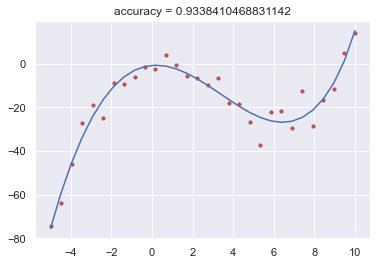

In [36]:
x_poly = polynomial_convert(x, degree = 12)
y_pred, score,score_test, coef = regression( Lasso(alpha=0), x_poly, y, x_poly, y)
plt.plot(x, y_pred)  #L = 0.0028
plt.scatter(x,y, s=10,color='r')
plt.title('accuracy = {}'.format(score))

In above we've used the $12^{th}$ degree polynimial and Lasso with alpha=0.
We will train lasso with different tuning parameters $\lambda= [10^{-4},10^{-3},10^{-2},10^{-1},1]$ in order to to get the their impact on the model.

In [163]:
def calc_weights(model, alphas):
    weights = np.array([])
    for alpha in alphas:
        y_pred, score, score_test,coef = regression( model(alpha=alpha), x_poly, y, x_poly, y)
        if weights.shape[0]>0 : 
            weights = np.vstack([weights,coef])
        else :
            weights = coef
    
    return weights.T

def plot_weights(weights):
    for i in range(weights.shape[0]):
        plt.plot(np.array(alphas),(weights[i,:]),label=r'$w_{}$'.format(i))

    plt.ylabel('weight size')
    plt.xlabel(r'$\lambda$')    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

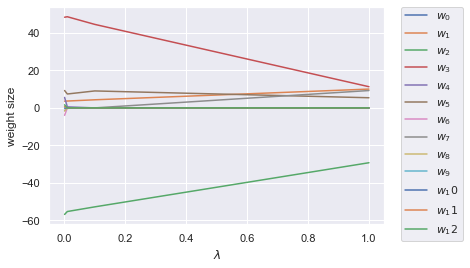

In [164]:
alphas = [10e-4, 10e-3, 10e-2,10e-1,1]
weights = calc_weights(Lasso, alphas)
plot_weights(weights)

From the above graphic, we can notice that when $ \lambda $ is increased then the weights (predictors) $ w_i $ goes to zero,  also the importent thing that we have to point out is the rate of decreasing of $ w_i $ is related to its size $\frac {\partial w_i} {\partial \lambda} = C.w$.<br><br> Let's see with bigger $\lambda= [1,10,20,30,100]$

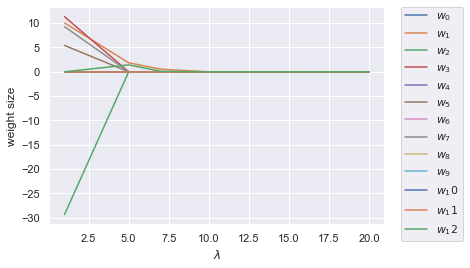

In [167]:
weights = np.array([])
alphas = [10e-1,1,5,7,10,20]
weights = calc_weights(Lasso, alphas)
plot_weights(weights)

From above we see that with bigger $\lambda$ the weights get a zero.Because of that we can use Lasso for feature selection.

The lasso performs  shrinkage so that there are "corners'' in the constraint, which in two dimensions corresponds to a diamond. If the sum of squares "hits'' one of these corners, then the coefficient corresponding to the axis is shrunk to zero.

<img alt="graph" class="rounded mx-auto d-block" height="303" src="https://miro.medium.com/max/720/1*WG4u9kaKfD4RVpVtZjD9pA.png" width="310">

<h2 id='feature'> Lasso as feature selection </h2>

We've seen that the regularisation process is controlled by the alpha parameter in the Lasso model. With higher alpha, some features get zero. As we've found that alpha with which the model works well and if some of the weights are zero we could drop the features related to these weights. Thus we make a feature selection.

Let's try to find the best alpha

In [149]:
 X_train, X_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.33, random_state=42)

In [150]:
weights = np.array([])
alphas = [10e-4,10e-3,10e-2,10e-1,10,100,1000]
scores =[]
scores_test = []
print(weights.shape)
for alpha in alphas:
    y_pred, score, score_test, coef = regression( Lasso(alpha=alpha), X_train, y_train, X_test, y_test)
    scores.append(score)
    scores_test.append(score_test)
    if weights.shape[0]>0 : 
        weights = np.vstack([weights,coef])
    else :
        weights = coef
weights = weights.T   

(0,)


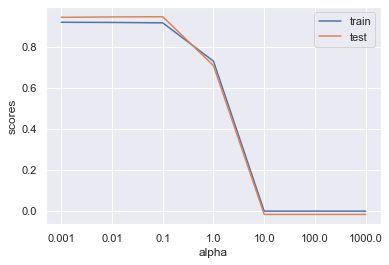

In [151]:
x_label=np.linspace(0,1,len(scores))
plt.plot(x_label,scores,label='train')
plt.plot(x_label,scores_test,label='test')
plt.xlabel('alpha')
plt.ylabel('scores')
plt.xticks(x_label, np.array(alphas).astype(str))
plt.legend()

In [91]:
scores_test

[0.9424123436147908,
 0.9441978248338849,
 0.9452458362554361,
 0.7075732312580467,
 -0.015979696071850125,
 -0.015979696071850125,
 -0.015979696071850125]

For $\alpha$ higher than $0.1$ both train and test accuracy gets to decrease. Therefore from the graphic, we can point $0.1$ as the best $\alpha$ for which the model achieved $0.94%$ on test data.

Text(0.5, 1.0, 'accuracy = 0.9319986935578851')

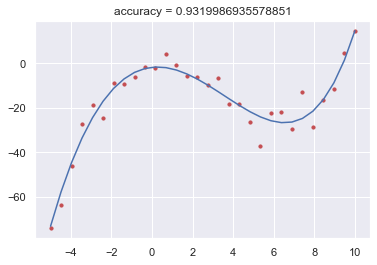

In [152]:
y_pred, score,score_test, coef = regression( Lasso(alpha=0.1), x_poly, y, x_poly, y)
plt.plot(x, y_pred)  #L = 0.0028
plt.scatter(x,y, s=10,color='r')
plt.title('accuracy = {}'.format(score_test))

For the predictors of model (weights) we have :

In [154]:
coef

array([  0.        ,   4.32734531, -52.88751358,  44.6197943 ,
         0.        ,   9.05931541,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ])

We can make feature selection by selecting only the columns (features) with non-zero weights and creating new data set.

In [158]:
print('important features : ',np.nonzero(coef))

important features :  (array([1, 2, 3, 5], dtype=int64),)


In [159]:
x_data_new = x_poly[:,(1, 2, 3, 5)]

Let's try to train a new model using only the selected features by Lasso into Linear Regression.

In [160]:
y_pred, score_train, score_test, coef = regression(LinearRegression(), x_selected_feature, y, x_selected_feature, y)

Text(0.5, 1.0, 'accuracy = 0.9334067494986096')

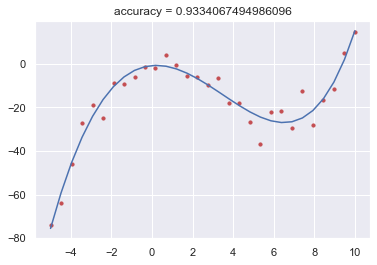

In [161]:
plt.plot(x, y_pred)  #L = 0.0028
plt.scatter(x, y, s=10, color='r')
plt.title('accuracy = {}'.format(score_train))

In [162]:
print('old data set shape', x_poly.shape)
print('new data set shape', x_selected_feature.shape)

old data set shape (30, 13)
new data set shape (30, 4)


We've achieved the same result by dimensionally reducted of old data set   from  (30,13)  to  (30,13).
 

<h2 id='ridge'>Ridge regression (L2 regularization) </h2> 

Ridge regression as the Lasso is form of regularized regression.The both methods seek to alleviate the consequences of multi-collinearity, poorly conditioned equations, and overfitting.

Ridge regression as Lasso is motivated by a constrained minimization problem, which can be formulated as follows:

The lost function of the Lasso is the ordinary least square with constraint optimization.<br> <br>
    $$J(\varTheta) = \frac{1}{2m}\sum_{i}^n(  y_i - \sum_j^mx_{ij}\theta_j)^2 $$
    $$subject \; to \hspace{1cm} \sum_j^m\theta_j^2 < \lambda $$

Using a Lagrange multiplier we can rewrite the problem as:
$$RidgeLost = J(\varTheta) = \frac{1}{2m}\sum_{i}^n(  y_i - \sum_j^m x_{ij}\theta_j )^2 + \lambda \sum_j^m\theta_j^2$$

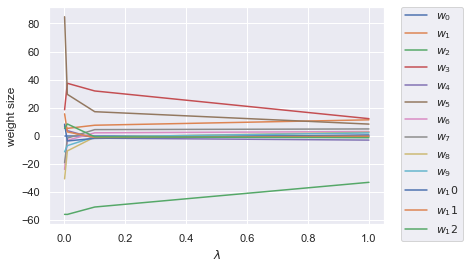

In [165]:
alphas = [10e-4, 10e-3, 10e-2,10e-1,1]
weights = calc_weights(Ridge, alphas)
plot_weights(weights)

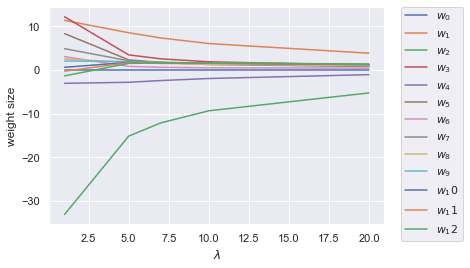

In [168]:
weights = np.array([])
alphas = [10e-1,1,5,7,10,20]
weights = calc_weights(Ridge, alphas)
plot_weights(weights)


Ridge regression decreases the complexity of a model but does not reduce the number of variables since it never leads to a coefficient been zero rather only minimizes it. Hence, this model is not good for feature reduction.

<img src="https://res.cloudinary.com/dyd911kmh/image/upload/v1648205672/image18_a3zz7y.png" loading="lazy">

Considering the geometry of both the lasso (left) and ridge (right) models, the elliptical contours (red circles) are the cost functions for each. Relaxing the constraints introduced by the penalty factor leads to an increase in the constrained region (diamond, circle). Doing this continually, we will hit the center of the ellipse, where the results of both lasso and ridge models are similar to a linear regression model.

However, both methods determine coefficients by finding the first point where the elliptical contours hit the region of constraints. Since lasso regression takes a diamond shape in the plot for the constrained region, each time the elliptical regions intersect with these corners, at least one of the coefficients becomes zero. This is impossible in the ridge regression model as it forms a circular shape and therefore values can be shrunk close to zero, but never equal to zero.

<h2> K-fold cross validation </h2>

<h2> References </h2>
[1] <a href='https://www.datacamp.com/tutorial/tutorial-lasso-ridge-regression'>Lasso and Ridge Regression Tutorial</a> <br>
https://www.datacamp.com/tutorial/tutorial-ridge-lasso-elastic-net ,bR>
https://online.stat.psu.edu/stat508/lesson/5/5.4 <br>
https://www.datacamp.com/tutorial/tutorial-lasso-ridge-regression#why-lasso-can-be-used-for-model-selection,-but-not-ridge-regression